<a href="https://colab.research.google.com/github/stevengregori92/Data-Science-Salaries/blob/main/Project_Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Data Science Salaries

## Goal of project
- The goal of this project is to present insightful statistics of Data Science Salaries
- The local newspaper (or online site) want to write an article on how lucrative it is to be Data Science

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Use ```pd.read_csv()``` to read the file `files/data_science_salaries.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected
- Dataset is from **Kaggle** (Get updated dataset [here](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries))

In [ ]:
data = pd.read_csv('data_science_salaries.csv')

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


### Step 1.c: Inspect the data
- Check the size of the dataset
- Can you make conclusions based on it?

In [ ]:
len(data)

245

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [ ]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```

In [ ]:
data.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

### Step 2.c: Understand features
- Most features has categories
- A way to categorize them is by using `data['work_year'].unique()`
- Similar for the other categories. Example:
    - `experience_level`: 
        - EN: Entry-level / Junior
        - MI: Mid-level / Intermediate
        - SE: Senior-level / Expert
        - EX: Executive-level / Director
- See full description on [Kaggle](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries)

In [ ]:
data['work_year'].unique()

array(['2021e', '2020'], dtype=object)

In [ ]:
data['experience_level'].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

In [ ]:
data['employee_residence'].unique()

array(['DE', 'GR', 'RU', 'US', 'FR', 'AT', 'CA', 'UA', 'NG', 'PK', 'IN',
       'GB', 'ES', 'IT', 'PL', 'BG', 'PH', 'PT', 'HU', 'SG', 'BR', 'MX',
       'TR', 'NL', 'AE', 'JP', 'JE', 'PR', 'RS', 'KE', 'CO', 'NZ', 'VN',
       'IR', 'RO', 'CL', 'BE', 'DK', 'CN', 'HK', 'SI', 'MD', 'LU', 'HR',
       'MT'], dtype=object)

### Step 2.d: Salaries
- Notice that salaries are given in different currencies
- Also, notice `salary_in_usd`

In [ ]:
data['salary_in_usd'].unique()

array([ 64369,  68428,  85000, 230000, 125000, 120000, 450000,  46759,
        74130, 127543, 144000,  13400,  75966, 150000, 103000, 153000,
        90000,  60000,  50000,  12000,   5423, 270000,  54376,  47681,
       154963,  28801, 110000,  83000, 250000,  59601,  80000,  10000,
       138000, 140000,  79866, 170000,  45760, 100000,  53641, 235000,
        79833, 225000,  77481,  50180,  89402, 103750, 114125,  95362,
        30509, 115000, 187917,  51814, 106000, 112872,  36732,  15966,
        96554,  70000,  76958,  89514,  29831, 276000, 188000, 160000,
       105000, 200000, 174000,  93000,  28475,  61270,  70139,   6072,
        33511,  96833,  13105,  36952,  72625,  91000,  99956, 165000,
       103954,  21695,  42000,  63971, 260000, 180000, 109024, 256000,
        72500, 185000,  70329, 112000,  21843,  55000,  58000,  78340,
        72000,  65561,  30337, 111775,  93150,  25747,  66442,  16949,
       190000, 143043,  16271,  71968,  35735, 135000,  25032,  54238,
      

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Explore features
- One way to explore features is as follows (here we explore `experience_level`)
```Python
data.groupby('experience_level')['salary_in_usd'].describe()
```
- Explore other features

In [ ]:
data.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [ ]:
data.groupby('salary_currency')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
BRL,2.0,16026.000000,4279.410240,13000.0,14513.00,16026.0,17539.00,19052.0
CAD,10.0,96996.900000,38463.170062,54376.0,72967.50,92159.0,102954.50,187917.0
CLP,1.0,40798.000000,NaN,40798.0,40798.00,40798.0,40798.00,40798.0
CNY,1.0,43331.000000,NaN,43331.0,43331.00,43331.0,43331.00,43331.0
DKK,2.0,37373.000000,12053.342192,28850.0,33111.50,37373.0,41634.50,45896.0
EUR,57.0,67260.771930,33038.878733,15966.0,45773.00,62726.0,79833.00,175228.0
GBP,13.0,86447.076923,23669.136058,51814.0,66400.00,83000.0,109024.00,117583.0
HUF,2.0,36233.500000,704.985461,35735.0,35984.25,36233.5,36482.75,36732.0
INR,21.0,26353.095238,22638.730510,5423.0,6072.00,21695.0,30509.00,94917.0


### Step 3.b: Explore data on two columns
- Say you want to investigate two columns: `experience_level` and `company_size`
```Python
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()
```
- Try similar for other combinations

In [ ]:
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()

experience_level  company_size
EN                L                75148.000000
                  M                41063.923077
                  S                57502.000000
EX                L               239729.875000
                  M                85000.000000
                  S               243164.500000
MI                L                96285.451613
                  M                83982.800000
                  S                47610.000000
SE                L               134465.604651
                  M               122572.125000
                  S               120978.055556
Name: salary_in_usd, dtype: float64

### Step 3.c: Describe data on two columns
- How does the spread look like.
- Can we conclude anything based on data
```Python
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()
```

In [ ]:
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()

count           mean            std      min  \
company_size experience_level                                                 
L            EN                 19.0   75148.000000   64087.707409   5898.0   
             EX                  8.0  239729.875000  163591.318040  79833.0   
             MI                 62.0   96285.451613   80426.650346   6072.0   
             SE                 43.0  134465.604651   74345.888870  21843.0   
M            EN                 13.0   41063.923077   30822.672549   4000.0   
             EX                  1.0   85000.000000            NaN  85000.0   
             MI                 25.0   83982.800000   87827.739265   4000.0   
             SE                 16.0  122572.125000   51404.202382  19052.0   
S            EN                 22.0   57502.000000   39823.933768   6072.0   
             EX                  2.0  243164.500000  244426.308160  70329.0   
             MI                 16.0   47610.000000   32458.213574   2876.0   
             SE                 18.0  120978.055556   66689.351887  33511.0   

                                     25%       50%        75%       max  
company_size experience_level                                            
L            EN                 33730.50   64369.0   87000.00  250000.0  
             EX                148260.75  192481.5  257500.00  600000.0  
             MI                 46851.50   82500.0  112654.00  450000.0  
             SE                 74147.00  135000.0  174000.00  412000.0  
M            EN                 21695.00   28475.0   65561.00  100000.0  
             EX                 85000.00   85000.0   85000.00   85000.0  
             MI                 38776.00   61985.0  111775.00  450000.0  
             SE                 94552.00  117062.5  166250.00  195000.0  
S            EN                 18993.75   55660.5   88750.00  138000.0  
             EX                156746.75  243164.5  329582.25  416000.0  
             MI                 17737.25   46720.5   68300.00  110000.0  
             SE                 78110.75  108898.5  160000.00  260000.0

### Step 3.d: Visualize the description
- What does this tell you
```Python
data.boxplot(column='salary_in_usd', by='company_size')
```
- Do this for other features of your interest

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


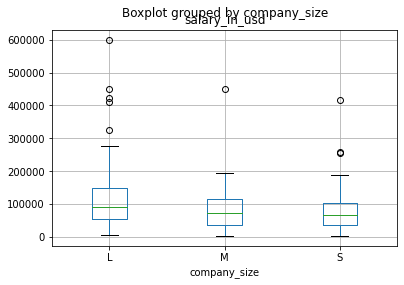

In [ ]:
data.boxplot(column='salary_in_usd', by='company_size')
plt.show()

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present your findings
- Here we focus on `company_size` and `experience_level`
- Create a data frame for the data to plot.
    - This makes easy to re-order index and column
- Notice: Do it for the features you want to present
```Python
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
```
- [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) unstacks multiindex

In [ ]:
plot_data = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
plot_data

experience_level,EN,EX,MI,SE
company_size,,,,
L,75148.000000,239729.875,96285.451613,134465.604651
M,41063.923077,85000.000,83982.800000,122572.125000
S,57502.000000,243164.500,47610.000000,120978.055556


### Step 4.b: Re-order index and columns
- We do this to present data in a logical way
- Use `reindex(index=['S', 'M', 'L'])` (assuming the same example)
- Re-order columns simply by filtering with `['EN', 'MI', 'SE', 'EX']`

In [ ]:
plot_data = plot_data.reindex(index=['S', 'M', 'L'])
plot_data = plot_data[['EN', 'MI', 'SE', 'EX']]
plot_data

experience_level,EN,MI,SE,EX
company_size,,,,
S,57502.000000,47610.000000,120978.055556,243164.500
M,41063.923077,83982.800000,122572.125000,85000.000
L,75148.000000,96285.451613,134465.604651,239729.875


### Step 4.c: Visualize results
- Visualize your result with a bar-plot
    - HINT: `plot.bar()`
- Finalize with title and labels

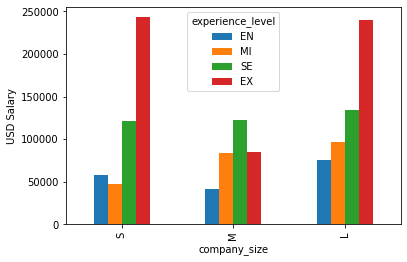

In [ ]:
plot_data.plot.bar(ylabel = 'USD Salary')
plt.show()

### Step 4.d: Credability considerations
- With the insights we have from our analysis - could we tell another story?
- Examples:
    - Spread of salary
    - Outliers
    - Size of dataset and categories used

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a:
- How could we use insights?
- How to measure it?